# Importing Data 

In [295]:
import pandas as pd 
import sqlite3

In [296]:
!ls zippedData/

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tmdb.movies.csv.gz
im.db                   rt.reviews.tsv.gz       tn.movie_budgets.csv.gz


In [297]:
conn = sqlite3.connect("zippedData/im.db")

## bom

In [298]:
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [319]:
bom.head(5)

,title,studio,domestic_gross,foreign_gross,year,total_gross,total_gross_in_millions
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09,1067.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09,1025.5
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08,960.3
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08,828.3
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08,752.6


## movies

In [300]:

movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [320]:
movies.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## movie_budgets 

In [302]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [303]:
movie_budgets.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Questions 
- What studio had the greatest total gross earnings? 
- What type of relationship is there between production budget and worldwide gross earnings?
- What release date had the greatest gross earnings? 

## Q1: What studio had the greatest total gross earnings ?

In [304]:
len(bom)

3387

In [305]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [306]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [307]:
'''
This line of code was used to fill in null values under the domestic_gross columns with 0. 
'''
domestic_gross = bom.loc[:,"domestic_gross"].fillna(0)
print(domestic_gross)

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64


Filling null values with 0 is resonable to assume that they did not have any gross earnings. 

In [308]:
'''
This line of code was used to take out commas, fill null values with 0, and convert the dtype to a float. 
'''
foreign_gross = bom.loc[:,"foreign_gross"].str.replace(",","").astype(float).fillna(0)

In [309]:
print(foreign_gross)

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            0.0
3383            0.0
3384            0.0
3385            0.0
3386            0.0
Name: foreign_gross, Length: 3387, dtype: float64


In [310]:
bom['total_gross'] = foreign_gross + domestic_gross 

In [311]:
bom

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,NaN,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,NaN,2018,2.400000e+03


In [312]:
'''
Line of code to create a new column where total_gross is now displayed in millions rounded to the second
decimal place which is easier to read than total_gross in scientific method

'''
bom['total_gross_in_millions'] = bom['total_gross'].div(1000000).round(2)

In [314]:
bom

,title,studio,domestic_gross,foreign_gross,year,total_gross,total_gross_in_millions
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09,1067.00
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09,1025.50
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08,960.30
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08,828.30
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08,752.60
...,...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,6.200000e+03,0.01
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,4.800000e+03,0.00
3384,El Pacto,Sony,2500.0,NaN,2018,2.500000e+03,0.00
3385,The Swan,Synergetic,2400.0,NaN,2018,2.400000e+03,0.00


In [339]:
studios = bom.groupby('studio')['total_gross_in_millions'].agg(['mean','count']).reset_index()
# make groupby more complicated to set a limit on how many movies each studio produced 

In [343]:
studios

,studio,mean,count
0,3D,16.000000,1
1,A23,0.080000,2
2,A24,11.482857,49
3,ADC,0.125000,2
4,AF,0.941667,6
...,...,...,...
252,XL,0.230000,2
253,YFG,1.100000,1
254,Yash,21.746429,14
255,Zee,1.670000,1


In [348]:
studios_clean = studios.loc[studios['count']>3].sort_values('mean', ascending = False)

In [349]:
studios_clean

,studio,mean,count
171,P/DW,507.650000,10
36,BV,417.102642,106
247,WB (NL),229.660000,45
93,Fox,227.980588,136
246,WB,220.256857,140
...,...,...,...
104,Grav.,0.122000,5
50,CLS,0.087500,4
152,Mont.,0.076250,8
118,Icar.,0.075000,4


In [ ]:
# Want to only plot the studios that produced at least 3 films to be able to compare them

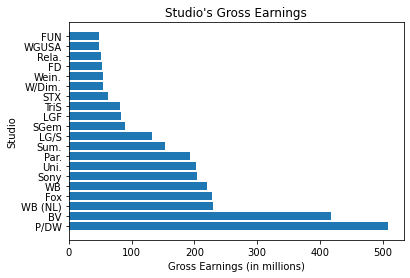

In [367]:
'''
These lines of code plot the top 20 studios with the greatest
gross earnings and that produced at least 3 films. 
'''

from matplotlib import pyplot as plt
import numpy as np 


fig, ax = plt.subplots()
ax.barh(y= studios_clean.head(20)['studio'], width = studios_clean.head(20)['mean'])
ax.set_title("Studio's Gross Earnings")
ax.set_xlabel("Gross Earnings (in millions)")
ax.set_ylabel("Studio")

plt.show()

## Q2: What type of relationship is there between production budget and worldwide gross earnings?

In [278]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


<AxesSubplot:xlabel='production_budget', ylabel='worldwide_gross'>

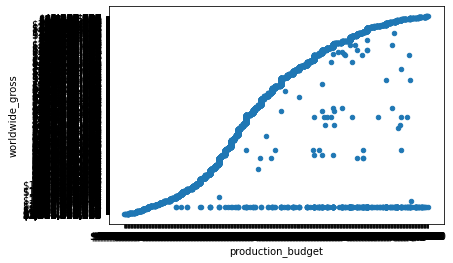

In [327]:
# from matplotlib import pyplot as plt
# fig, ax = plt.subplots(kind ='scatter')

# ax.set_title("Production Budget vs. Worldwide Gross Earnings")
# ax.set_xlabel("Production Budget")
# ax.set_ylabel("Worldwide Gross Earnings")
# plt.show()
movie_budgets.plot(x="production_budget", y="worldwide_gross", kind="scatter")

## Q3: What release date had the greatest gross earnings? 

In [329]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [330]:
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [147]:
# I want to merge both release date columns together 
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [148]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [149]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [151]:
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [154]:
movies['year'] = movies['release_date'].dt.year

In [156]:
movie_budgets['year'] = movie_budgets['release_date'].dt.year

In [170]:
movies.duplicated(['title','year']).sum()

1120

In [174]:
movies_clean = movies.sort_values(by="popularity", ascending=False).drop_duplicates(['title','year'])

In [175]:
len(movies_clean)

25397

In [169]:
movie_budgets.duplicated(['movie','year']).sum()

1

In [176]:
def movie_budgets_clean(x):
    '''
    A function to clean up money columns
    This removes '$' and ',', and turns the string into a float
    It is designed to be used with .apply on each column
    
    Input: x (string cell in a dataframe)
    Output: float version of x
    '''
    return float(x.replace("$", "").replace(",",""))

In [180]:
for column in['production_budget','domestic_gross','worldwide_gross']:
    movie_budgets[column] = movie_budgets[column].apply(movie_budgets_clean)

In [182]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015


In [ ]:
movie_budgets('')

# CRISP-DM

- Business Understanding
- Data Understanding
    - Data Prep
- Exploratory Data Analysis (EDA)
- Limitations
- Conclusion / Recommendations 
- Next steps (What else could we do with more data?)